In [1]:
from Game import *

Version:  0.2.17


In [2]:
def initial_state():
    return randint(15,25)

def valid_moves(state,player):
    if state==1:
        return [1]
    elif state==2:
        return [1,2]
    else:
        return [1,2,3]
        
def show_state(state):
    print ("There are ",state," sticks left.")

def update_state(state,player,move):
    new_state=state-move
    return new_state

def win_status(state,player):

    if state==1:
        return 'win'
    
    elif state==0:
        return 'lose'
    
    else:
        return None


def human_move(state,player):

    move=input('Take 1, 2 or 3 sticks ')
    return move


def perfect_move(state,player):
    move=(state-1)%4
    if move==0:
        move=1
    return move

def random_move(state,player):
    move=random_choice(valid_moves(state,player))
    return move


human_agent=Agent(human_move)
random_agent=Agent(random_move)
perfect_agent=Agent(perfect_move)


In [3]:
def Q_move(state,player,info):
    Q=info.Q
    last_action=info.last_action
    last_state=info.last_state
    
    alpha=info.alpha  # learning rate
    gamma=info.gamma  # memory 
    epsilon=info.epsilon  # probability of doing random move
    
    if not state in Q:
        Q[state]=Table()
        for action in valid_moves(state,player):
            Q[state][action]=0.0
            
    if random.random()<epsilon:  # random move
        action=random_choice(Q[state])
    else:
        action=top_choice(Q[state])
        
        
    if not last_action is None:  # anything but the first move
        r=0.0
        Q[last_state][last_action]+=alpha*(r + 
            gamma*max([Q[state][a] for a in Q[state]]) -
            Q[last_state][last_action] )
        
    return action

def Q_post(status,player,info):
    Q=info.Q
    last_action=info.last_action
    last_state=info.last_state
    
    alpha=info.alpha  # learning rate
    gamma=info.gamma  # memory 
    epsilon=info.epsilon  # probability of doing random move

    if status=='lose':
        r=-1.0
    elif status=='win':
        r=1.0
    else:
        r=0.0
        
    if not last_action is None:  # anything but the first move
        Q[last_state][last_action]+=alpha*(r -
            Q[last_state][last_action] )
        

In [4]:
Q_agent=Agent(Q_move)
Q_agent.post=Q_post

Q_agent.Q=LoadTable('Q_data.json')
Q_agent.alpha=0.3  # learning rate
Q_agent.gamma=0.9  # memory
Q_agent.epsilon=0.1  # chance of making a random move

In [5]:
g=Game()
g.run(Q_agent,perfect_agent)
g.report()

====
Game  1
There are  19  sticks left.
Player 1 moves 2
There are  17  sticks left.
Player 2 moves 1
There are  16  sticks left.
Player 1 moves 3
There are  13  sticks left.
Player 2 moves 1
There are  12  sticks left.
Player 1 moves 3
There are  9  sticks left.
Player 2 moves 1
There are  8  sticks left.
Player 1 moves 1
There are  7  sticks left.
Player 2 moves 2
There are  5  sticks left.
Player 1 moves 3
There are  2  sticks left.
Player 2 moves 1
There are  1  sticks left.
Player  2 won.
Total number of games:  1
Winning 0.00 percent
Losing 100.00 percent
Tie 0.00 percent


In [6]:
Q_agent.Q

{19: {1: 0.0, 2: 0.0, 3: 0.0},
 16: {1: 0.0, 2: 0.0, 3: 0.0},
 12: {1: 0.0, 2: 0.0, 3: 0.0},
 8: {1: 0.0, 2: 0.0, 3: 0.0},
 5: {1: 0.0, 2: 0.0, 3: -0.3}}

While learning, set epsilon to 0.1

In [7]:
Q_agent.epsilon=0.1

g=Game(number_of_games=1000)
g.display=False
g.run(Q_agent,perfect_agent)
SaveTable(Q_agent.Q,'Q_data.json')
g.report()

Total number of games:  1000
Winning 50.50 percent
Losing 49.50 percent
Tie 0.00 percent


In [8]:
Q_agent.Q

{19: {1: -0.4310576231289797, 2: 0.6560999999980722, 3: -0.024091992},
 16: {1: -0.7286021549272748, 2: -0.6864746460325868, 3: 0.7289999999999996},
 12: {1: -0.8052806660024375, 2: -0.7865536649797524, 3: 0.8099999999999997},
 8: {1: -0.8938835716724051, 2: -0.8978445584902576, 3: 0.8999999999999998},
 5: {1: -0.9999999999999999, 2: -0.9999999999999999, 3: -0.9999999999999999},
 22: {1: 0.5904899999963208, 2: -0.42084090887519654, 3: -0.5802426719876282},
 17: {1: -0.7289999999999996, 2: -0.7289999999999996, 3: -0.7289999999999996},
 13: {1: -0.8099999999999997, 2: -0.8099999999999997, 3: -0.8099999999999997},
 9: {1: -0.8999999999999998, 2: -0.8999999999999998, 3: -0.8999999999999998},
 24: {1: -0.530196016119708, 2: -0.38721811391294236, 3: 0.5904899999992816},
 20: {1: -0.6526962576779275, 2: -0.6243919189229024, 3: 0.6560999999999996},
 4: {1: -0.9976736948601279, 2: -0.9976736948601279, 3: 0.9999999999999999},
 23: {1: -0.28656769657462355, 2: 0.590489999998878, 3: -0.43393961381

When we want to see how good it really is, turn off epsilon (no random moves)

In [9]:
Q_agent.epsilon=0.0

g=Game(number_of_games=1000)
g.display=False
g.run(Q_agent,perfect_agent)
SaveTable(Q_agent.Q,'Q_data.json')
g.report()

Total number of games:  1000
Winning 72.60 percent
Losing 27.40 percent
Tie 0.00 percent


## Can a Q-agent play against another?

In [10]:
Q1_agent=Agent(Q_move)
Q1_agent.post=Q_post

Q1_agent.Q=LoadTable('Q1_data.json')
Q1_agent.alpha=0.3  # learning rate
Q1_agent.gamma=0.9  # memory
Q1_agent.epsilon=0.1  # chance of making a random move

Q2_agent=Agent(Q_move)
Q2_agent.post=Q_post

Q2_agent.Q=LoadTable('Q2_data.json')
Q2_agent.alpha=0.3  # learning rate
Q2_agent.gamma=0.9  # memory
Q2_agent.epsilon=0.1  # chance of making a random move


In [11]:
Q1_agent.epsilon=0.1
Q2_agent.epsilon=0.1

g=Game(number_of_games=1000)
g.display=False
g.run(Q1_agent,Q2_agent)
SaveTable(Q1_agent.Q,'Q1_data.json')
SaveTable(Q2_agent.Q,'Q2_data.json')
g.report()

Total number of games:  1000
Winning 61.20 percent
Losing 38.80 percent
Tie 0.00 percent


In [12]:
Q1_agent.epsilon=0.0
Q2_agent.epsilon=0.0
Q1_agent.alpha=0.0
Q2_agent.alpha=0.0

g=Game(number_of_games=1000)
g.display=False
g.run(Q1_agent,perfect_agent)
g.report()

Total number of games:  1000
Winning 73.30 percent
Losing 26.70 percent
Tie 0.00 percent


In [13]:
Q1_agent.epsilon=0.0
Q2_agent.epsilon=0.0
Q1_agent.alpha=0.0
Q2_agent.alpha=0.0

g=Game(number_of_games=1000)
g.display=False
g.run(perfect_agent,Q2_agent)
g.report()

Total number of games:  1000
Winning 71.70 percent
Losing 28.30 percent
Tie 0.00 percent


In [14]:
W=[]
L=[]
T=[]

n=[]
total_games=0
for i in range(100):
    
    # train with learning
    Q1_agent.epsilon=0.1
    Q2_agent.epsilon=0.1

    g=Game(number_of_games=1000)
    g.display=False
    result=g.run(Q1_agent,Q2_agent)

    SaveTable(Q1_agent.Q,"Nim Q1.json")
    SaveTable(Q2_agent.Q,"Nim Q2.json")

    # test with no learning
    Q1_agent.epsilon=0.0
    Q2_agent.epsilon=0.0
    
    g=Game(number_of_games=200)
    g.display=False
    result=g.run(Q1_agent,Q2_agent)
    
    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100

    total_games+=g.number_of_games
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    print('%.2f' % percent_wins," ",end="")

70.50  70.50  71.50  76.50  73.00  74.50  73.50  72.00  71.50  72.50  70.50  74.50  72.50  79.00  75.00  71.50  76.50  73.00  64.00  74.00  74.00  72.00  73.00  68.50  74.50  72.00  68.00  70.00  73.00  79.50  76.00  70.50  72.50  75.00  72.00  76.00  76.00  75.00  67.00  76.00  73.50  76.00  66.00  70.00  70.50  73.50  72.00  73.00  71.00  73.50  76.00  71.50  71.50  73.00  73.50  77.50  72.00  74.00  75.50  75.50  70.00  72.50  74.50  69.00  73.00  71.50  72.50  70.00  75.50  70.50  72.50  76.00  72.00  74.50  71.50  69.00  74.50  74.50  73.00  75.00  70.50  64.00  73.00  74.50  74.00  74.50  71.50  76.50  71.50  76.50  72.50  73.50  70.50  79.50  76.00  73.00  72.50  71.00  75.50  75.00  

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/bblais/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'draw', 'randint', 'copy', 'argmax', 'prod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


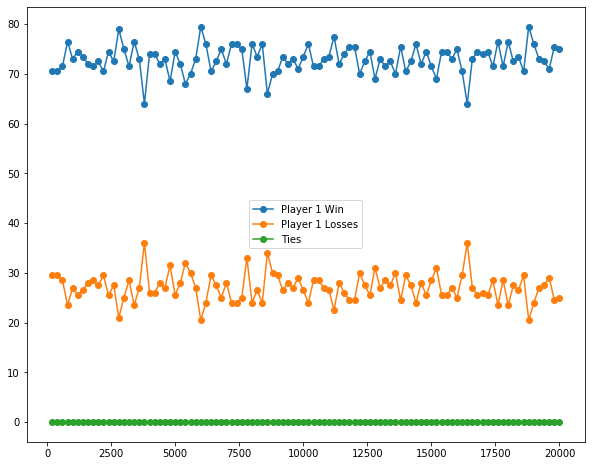

In [16]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Win')
plot(n,L,'-o',label='Player 1 Losses')
plot(n,T,'-o',label='Ties')
legend()

## things you should do:

1. run this more times and explain the structure of the json files
2. run this with tic tac toe